# HW1 - Exploring MLPs with PyTorch

In [39]:
import torch
from torchvision import transforms, datasets
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import time

In [40]:
device = torch.device('cpu')

In [41]:
# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset 
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='/Users/vashisth/Documents/GitHub/Intro_DL/IDL_hw1/data', 
                       train=True, 
                       download=True, 
                       transform=transform)
mnist_test = datasets.MNIST(root='/Users/vashisth/Documents/GitHub/Intro_DL/IDL_hw1/data',   # './data'
                            train=False, 
                            download=True, 
                            transform=transform)

In [42]:
from torch.utils.data import DataLoader, random_split

print("Frequencies: ", torch.bincount(mnist.targets))
print(len(torch.bincount(mnist.targets)))

Frequencies:  tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
10


In [43]:
# Split training data into training and validation sets
# Your code goes here
# train_set = ...
# val_set = ...
train_len = int(len(mnist) *.8)
val_len = len(mnist) - train_len
train_set, val_set = random_split(mnist, [train_len, val_len])

# Define DataLoaders to access data in batches
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
# Your code goes here
val_loader = DataLoader(val_set, batch_size = 64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size = 64, shuffle=False)

In [45]:
# Define your MLP
class RegressionMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(RegressionMLP, self).__init__()
        # Your code goes here
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation= nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, out_dim)
        self.activation_output= nn.Tanh()


    def forward(self, x):
        # Your code goes here
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation_output(x)
        return x

# Your code goes here
hidden_dim = 50
model = RegressionMLP(in_dim=28 * 28,
                  hidden_dim=hidden_dim,
                  out_dim=28*28).to(device)
print(model)

RegressionMLP(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=50, out_features=784, bias=True)
  (activation_output): Tanh()
)


In [46]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [47]:
num_epochs = 20
start_time = time.time()
for epoch in range(num_epochs):
    correct, count = 0, 0 
    for data, target in train_loader:
        # free the gradient from the previous batch
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        # reshape the image into a vector
        data = data.view(data.size(0), -1)
        # print(data.size())
        # print(output.size())
        # model forward
        output = model(data)
        # compute the loss
        loss = criterion(output, data)
        # model backward
        loss.backward()
        # update the model paramters
        optimizer.step()
       
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

training_time = time.time()- start_time
print(training_time)

torch.Size([64, 784])
torch.Size([16, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size

In [31]:
val_loss = count = 0
correct = total = 0
for data, target in val_loader:
    data, target = data.to(device), target.to(device)
    data = data.view(data.size(0), -1)
    output = model(data)
    val_loss += criterion(output, data).item()
    count += 1

val_loss = val_loss / count
print(f'Validation loss: {val_loss:.3f}')

Validation loss: 0.07


In [32]:
model.eval()
loss = count= 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        output = model(data)
        loss += criterion(output, data).item()
        count +=1
        
test_loss= loss/count
print(f'Test Loss: {test_loss:.2f}')

Test Loss: 0.07


In [52]:
# KeyError: had trouble writing over empty dic looked up that defaultdict can handle it without me having to explicity handle constraints 
# a = {}
# if 
# a[0] = [[1,2]]
# a

KeyError: 0

In [50]:
a[0] += [[3,4]]

{0: [[3, 4], [3, 4]]}

In [36]:
check_dict = defaultdict(list)

model.eval()
with torch.no_grad():  
    for data, target in test_loader:
        data = data.view(data.size(0), -1).to(device)
        output = model(data)

        for idx, label in enumerate(target):
            label = int(label.item())
            
            #loss for each image
            individual_loss = criterion(output[idx].unsqueeze(0), data[idx].unsqueeze(0)).item()
            
            # for storing arrays and outputs
            img_np = data[idx].numpy()
            output_np = output[idx].numpy()

            check_dict[label].append([img_np, output_np, individual_loss])


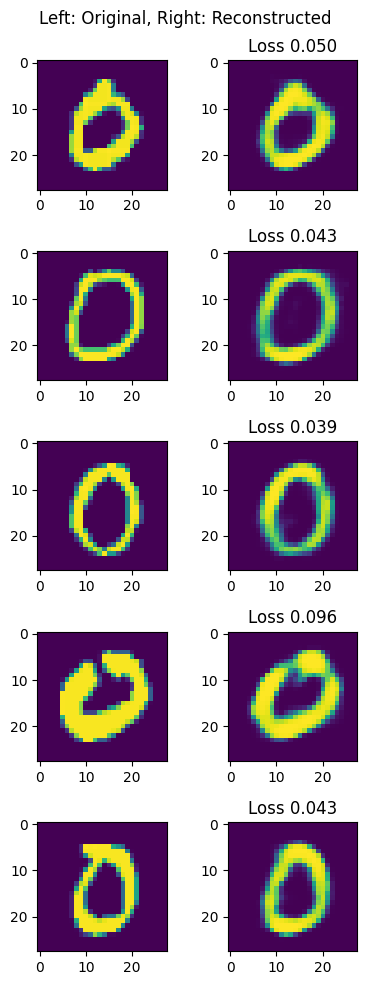

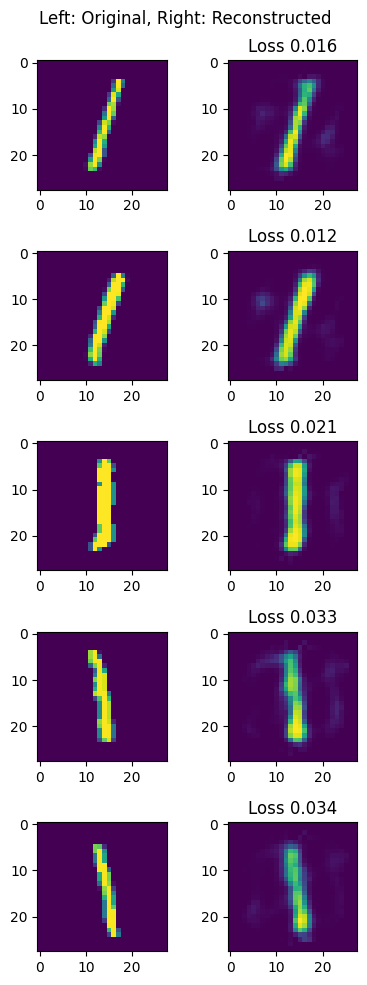

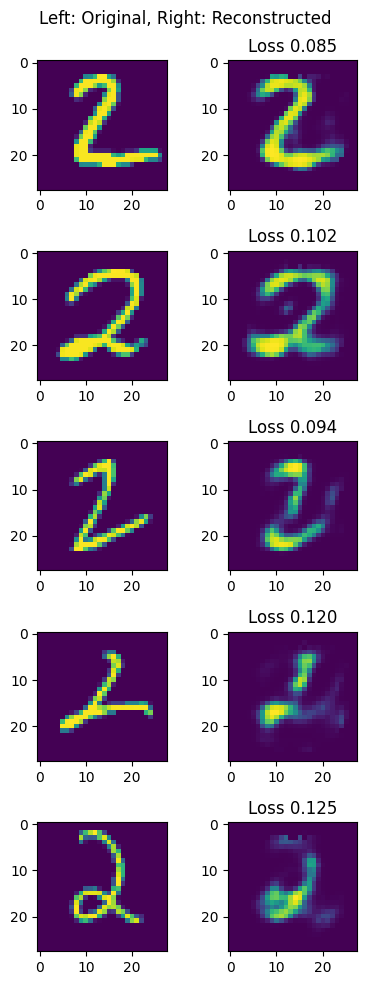

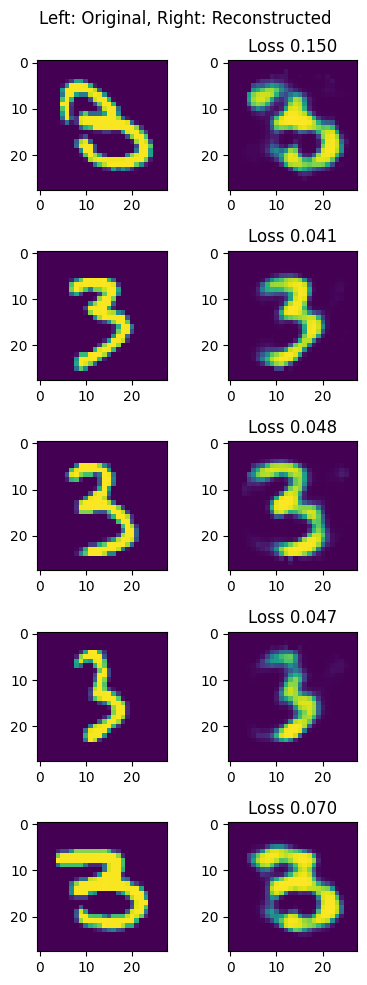

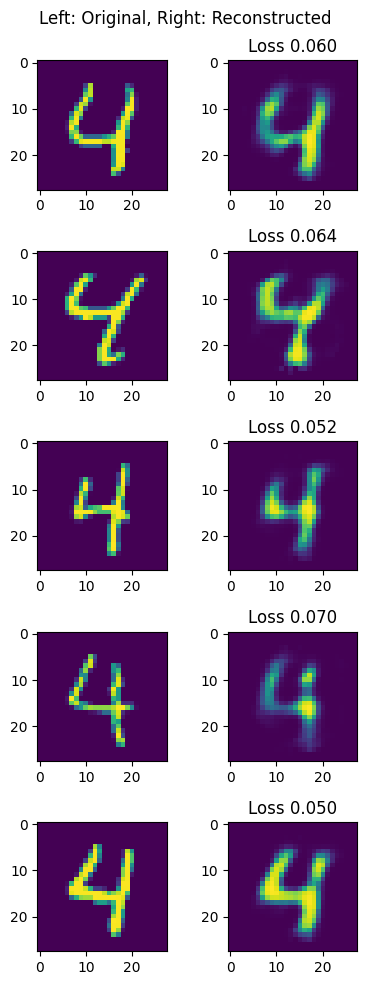

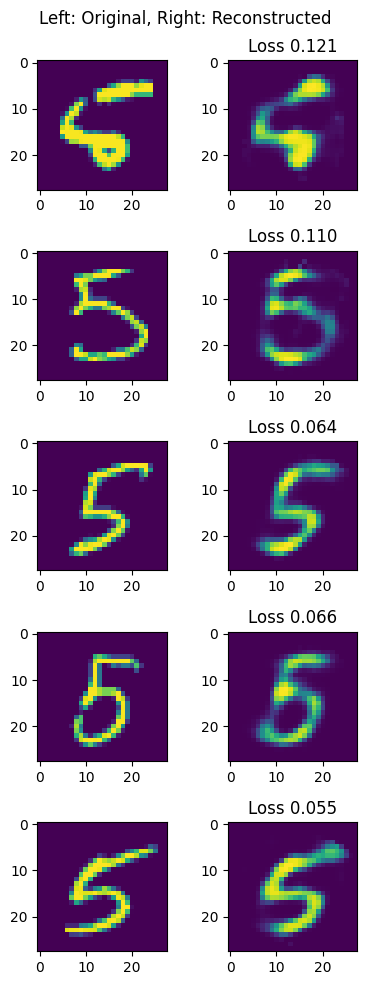

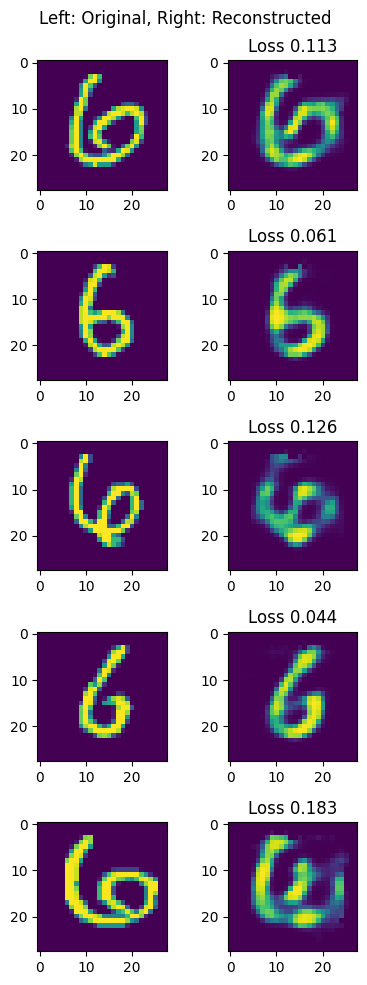

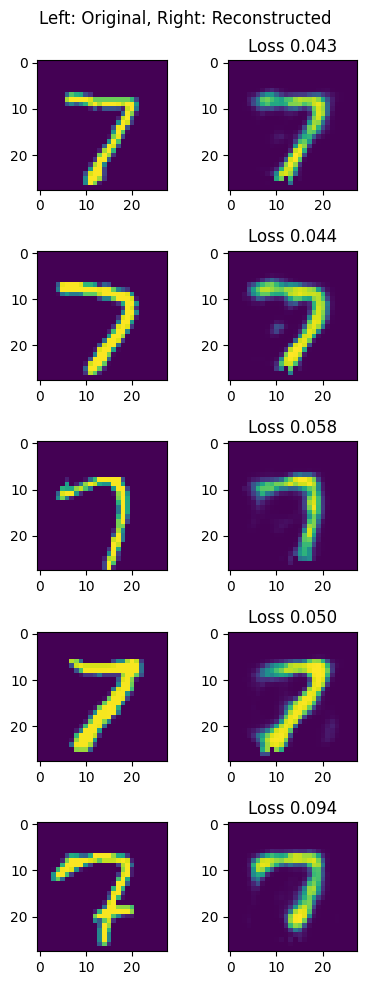

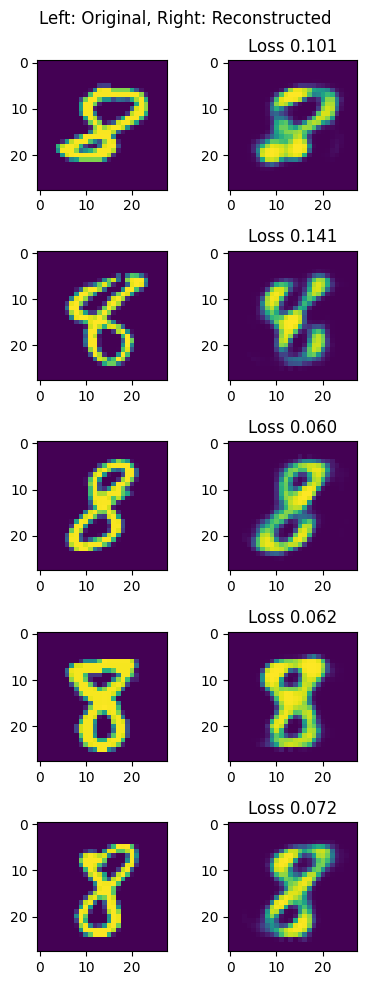

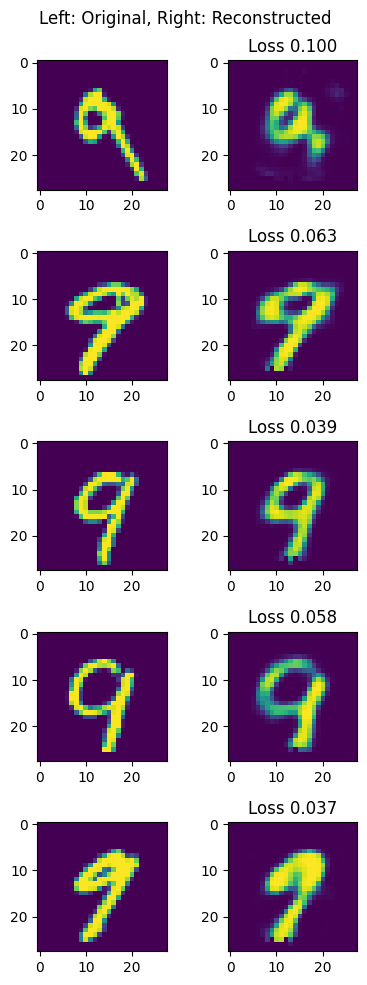

In [37]:
# https://stackoverflow.com/questions/55466298/pytorch-cant-call-numpy-on-variable-that-requires-grad-use-var-detach-num

#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
import matplotlib.pyplot as plt

for i in range(10):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(4,10))
    fig.suptitle('Left: Original, Right: Reconstructed')
    for j in range(5):
        axes[j,0].imshow(check_dict[i][j][0].reshape(28,28))
        axes[j,1].imshow(check_dict[i][j][1].reshape(28,28))
        axes[j,1].set_title(f'Loss {check_dict[i][j][2]:.3f}')
    fig.savefig(f'output_{i}.png')
    fig.tight_layout()

# Problem 4: Reconstruct the MNIST images by Regression
In this problem, we want to train the MLP (with only one hidden layer) to complete a regression task: reconstruct the input image. The goal of this task is dimension reduction, and we set the hidden layer dimension to a smaller number, say 50. Once we can train the MLP to reconstruct the input images perfectly, we find an lower dimension representation of the MNIST images.

Since this is a reconstruction task, the labels of the images are not needed, and the target is the same as the inputs. Mean Squared Error (MSE) is recommended as the loss function:

In [15]:
criterion = nn.MSELoss()

Another tip is to add a `torch.nn.Tanh()` activation layer to the end of the model. Recall that our data pre-processing converts the data into the range $[-1, 1]$:

In [16]:
# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

Having a `torch.nn.Tanh()` activation layer at the end of the model can convert the output of the model into the range $[-1, 1]$, making the training easier.

<span style="color:red">[YOUR TASK]</span>
- Define an MLP with only one hidden layer and set the hidden layer dimension as 50. Train the MLP to reconstruct input images from all 10 digits.
- Report the Mean Squared Error on the training, validation and test set. Report your hyper-parameter details.
- Pick 5 images for each digit from the test set. Visualize the original images and the reconstructed images using the MLP.

In [17]:
# Your code goes here